### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/StudentsPerformance.csv')

# Entendimiento de los datos

In [2]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
# Analizamos la estructura de nuestro data frame, para ver si contiene valores nulos, los tipos de objetos y las columnas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# Obtenemos un análisis estadístico de los datos numéricos de nuestro data frame

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [6]:
df.value_counts('gender')

gender
female    518
male      482
dtype: int64

In [7]:
df.value_counts('race_ethnicity')

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
dtype: int64

# Limpieza de los datos

* Drop de columnas y filas irrelevantes
* Identificar columnas duplicadas
* Renombrar valores de columnas

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df = df.rename(columns={
                        'race_ethnicity': 'ethnicity',
                        'parental_level_of_education': 'parent_education',
                        'test_preparation_course': 'preparation'
                        })

In [10]:
df.head()

,gender,ethnicity,parent_education,lunch,preparation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.isnull().sum()

gender              0
ethnicity           0
parent_education    0
lunch               0
preparation         0
math_score          0
reading_score       0
writing_score       0
dtype: int64

In [12]:
pd.isna(df).sum()

gender              0
ethnicity           0
parent_education    0
lunch               0
preparation         0
math_score          0
reading_score       0
writing_score       0
dtype: int64

In [13]:
df.loc[df.duplicated()]

# No es necesario analizar duplicados por columna ya que por la naturaleza del data set, se permiten registros duplicados en las columnas

,gender,ethnicity,parent_education,lunch,preparation,math_score,reading_score,writing_score


### Conclusiones del proceso de limpieza

* Se cambio el nombre de algunas columnas para una mejor manipulacion de estas

* Se verificó que no existieran valores duplicados

* Se verificó que no existieran valores nulos

* Se verificó que no existieran valores numéricos NaN

# Análisis univariado

* Graficas de las distribuciones
    * Histogramas
    * KDE
    * Boxplot

In [25]:
df.head()

,gender,ethnicity,parent_education,lunch,preparation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

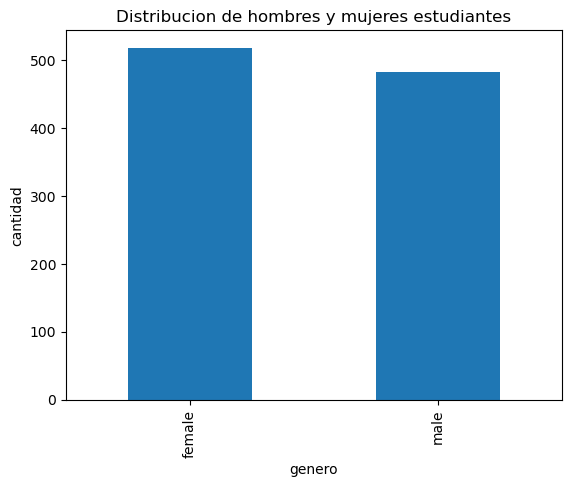

In [36]:
gender_plot = df['gender'].value_counts() \
    .plot(kind = "bar", title = 'Distribucion de hombres y mujeres estudiantes')

gender_plot.set_xlabel('genero')
gender_plot.set_ylabel('cantidad')

plt.show()

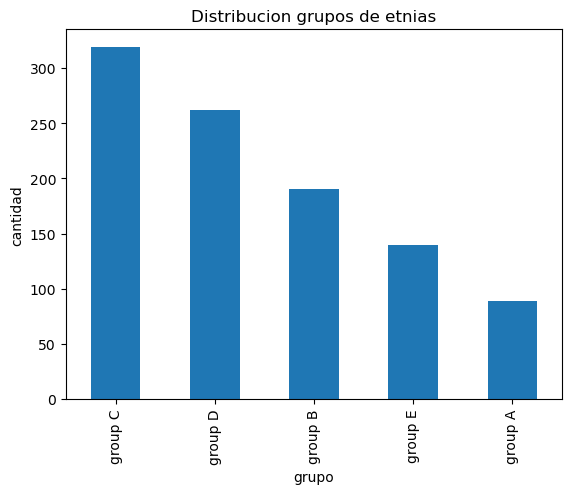

In [38]:
eth_plot = df['ethnicity'].value_counts() \
    .plot(kind = "bar", title = 'Distribucion grupos de etnias')

eth_plot.set_xlabel('grupo')
eth_plot.set_ylabel('cantidad')

plt.show()

In [40]:
df.head()

,gender,ethnicity,parent_education,lunch,preparation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


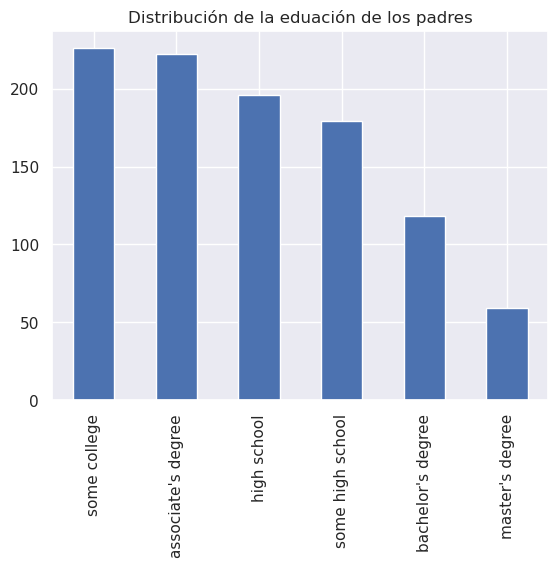

In [70]:
parent_plot = df['parent_education'].value_counts() \
                .plot(kind="bar", title="Distribución de la eduación de los padres")
                

In [42]:
df.head()

,gender,ethnicity,parent_education,lunch,preparation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: xlabel='lunch', ylabel='count'>

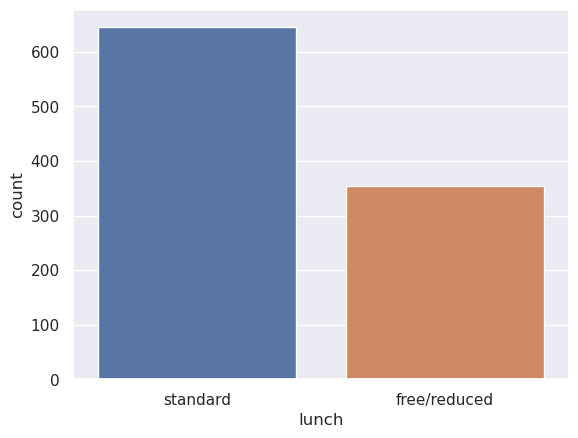

In [74]:
sns.countplot(data=df, x='lunch')

<Axes: xlabel='preparation', ylabel='count'>

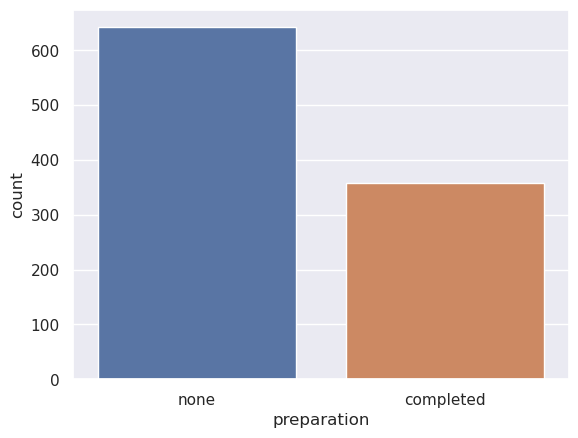

In [73]:
sns.countplot(data=df, x='preparation')

<Axes: xlabel='math_score', ylabel='Count'>

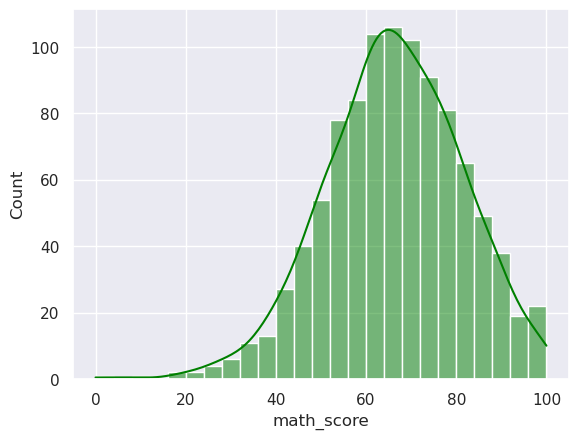

In [75]:
sns.histplot(data=df, x='math_score', color="green", kde=True)

<Axes: xlabel='reading_score', ylabel='Count'>

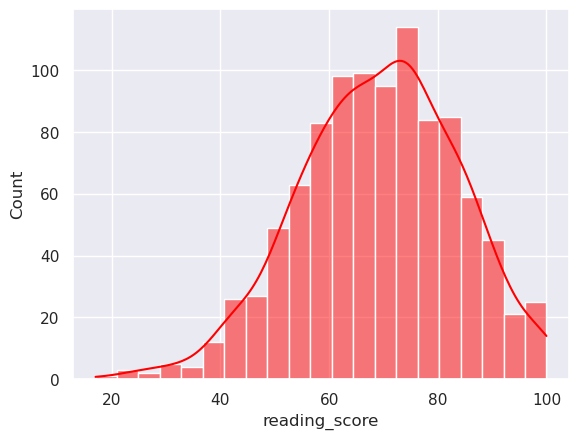

In [85]:

sns.histplot(data=df, x="reading_score", color='red', kde=True)


<Axes: xlabel='writing_score', ylabel='Count'>

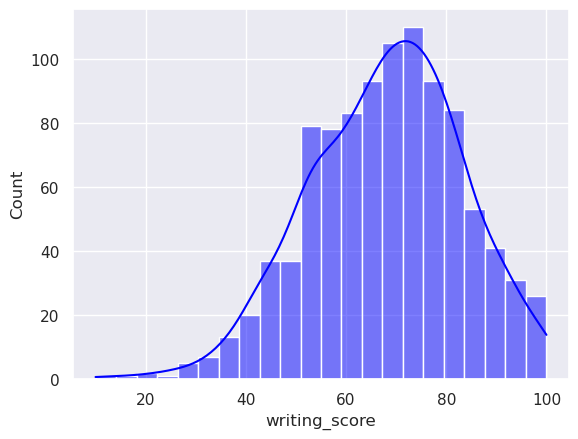

In [91]:
sns.histplot(data=df, x='writing_score', color='blue', kde=True)

<Axes: >

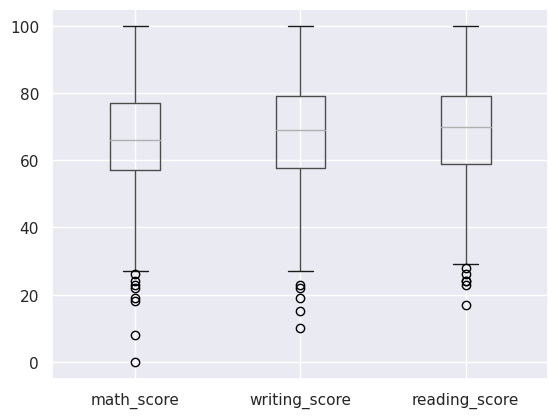

In [92]:
df[['math_score', 'writing_score', 'reading_score']].boxplot()

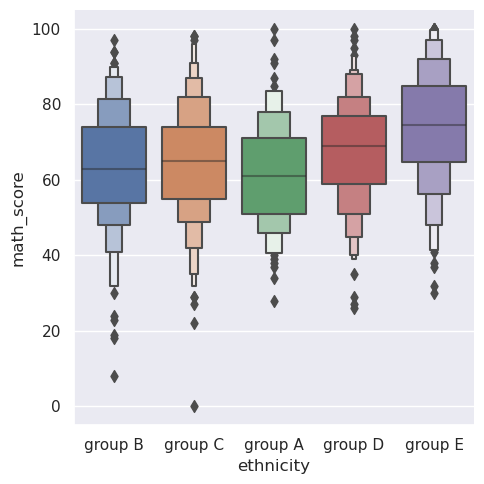

In [117]:
sns.catplot(data=df, x='ethnicity', y='math_score', kind="boxen")